In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
results_folder = r'../example/results/boxplot'
stations_csv_file = r'../example/data/Stations.csv'
precipitations_daily_ts_parquet = r'precipitations_daily_time_series.parquet' 

if not os.path.exists(results_folder):
    os.mkdir(results_folder)


In [3]:
df = pd.read_parquet(precipitations_daily_ts_parquet)
df_stations = pd.read_csv(stations_csv_file)

In [4]:
stations_dict = { x['Id'] : x['Name']  for x in df_stations.to_dict(orient='records')}
df['StationName'] = df['StationId'].apply(lambda x: stations_dict[x])

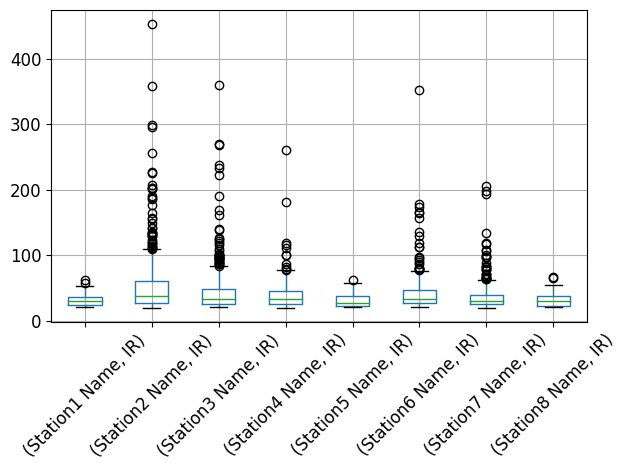

In [10]:
grouped = df[(df['IR']>20) & (df['IR']<600)].groupby('StationName')

boxplot_figure = plt.figure()
boxplot_figure.title = 'BoxPlot'
grouped.boxplot(subplots=False, rot=45, column='IR', fontsize=12, figsize=(10,10))  

plt.tight_layout()
boxplot_figure.savefig(os.path.join(results_folder, "boxplot.png"))
